

**Submitted By:   APARNAA M**

**REG NO: 20MDT1009**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

Given the data collected on, use the linear regression model
to fit the model and check for the goodness of the model using R2 value.


In [2]:
df = pd.read_csv('/content/salary_predict_dataset.csv')
df.head()


,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [3]:
df.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [7]:
#Lets get total score from test and interview sco
total_score= df["test_score"] + df["interview_score"]
df["total_score"] = total_score
print(df)

   experience  test_score  interview_score  Salary  total_score
0         NaN         8.0              8.0   50000         16.0
1         NaN         5.0              4.0   22000          9.0
2       three         6.0              5.0   30000         11.0
3        five         9.0              9.0   55000         18.0
4         six         3.0              5.0   13000          8.0
5         NaN         2.0              1.0    9000          3.0
6         ten         8.0              6.0   48000         14.0
7         one         1.0              2.0     500          3.0
8     fifteen         9.0              9.0   60000         18.0
9    thirteen         7.5              7.5   45000         15.0
10        ten         NaN              5.0   25000          NaN
11        NaN         1.0              1.0     500          2.0
12        one         3.0              6.0   25000          9.0
13       four         5.0              4.0   36000          9.0
14        six         5.0              N

In [16]:
#Handling missing values , since we have very lessmissing values we simply drop the null values.
new_df=df. dropna()
new_df

,experience,test_score,interview_score,Salary,total_score
2,three,6.0,5.0,30000,11.0
3,five,9.0,9.0,55000,18.0
4,six,3.0,5.0,13000,8.0
6,ten,8.0,6.0,48000,14.0
7,one,1.0,2.0,500,3.0
8,fifteen,9.0,9.0,60000,18.0
9,thirteen,7.5,7.5,45000,15.0
12,one,3.0,6.0,25000,9.0
13,four,5.0,4.0,36000,9.0
15,eleven,9.0,8.0,55000,17.0


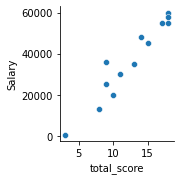

In [17]:
sns.pairplot(new_df, x_vars=["total_score"],y_vars=["Salary"])

For Linear Regression model lets have x= total_score and Y=Salary to predict the salary amount based on the test score of the candidate.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


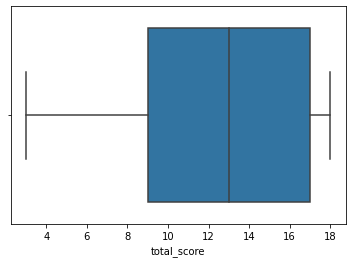

In [18]:
sns.boxplot(new_df["total_score"])
plt.show()

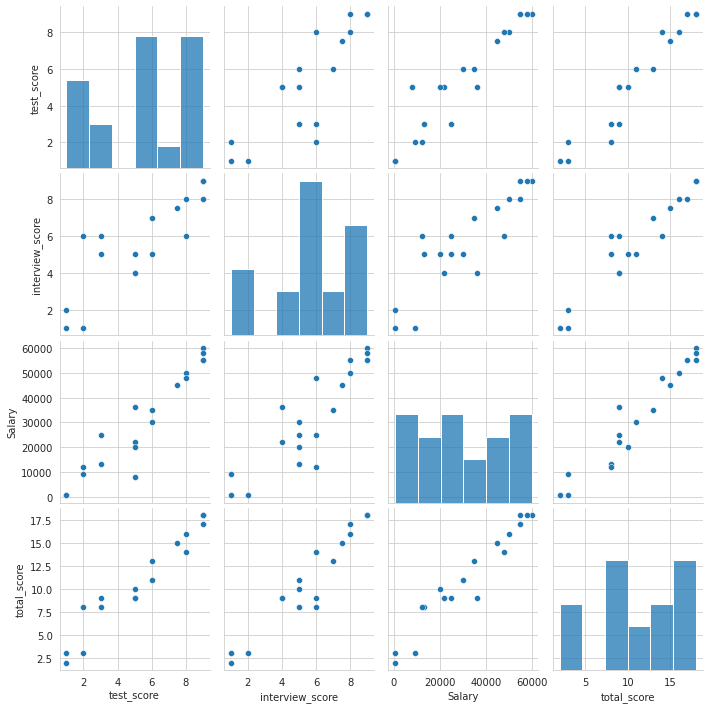

In [52]:
sns.pairplot(df)

In [20]:
X=new_df[["total_score"]]

Y=new_df["Salary"]


Split the data into train and test set

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.01,random_state=100)


Fit the model

In [42]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [43]:
# b is coefficient , Bo is intercept

b_0 = model.intercept_
b = model.coef_

print("The coefficients are:")
print("b_0:", b_0,"\n", "b:", b)


The coefficients are:
b_0: -11169.252977264536 
 b: [3838.14507398]


Goodness of Fit

In [44]:
y_pred = model.predict(X_test) # y_pred = b_0 + b_1*x_1 + ..
y_pred
r_2 = r2_score(y_test,y_pred)
print("The value of R^2:",r_2)


The value of R^2: nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


**Example:**

Lets assume if the total score of the candidate is 7 , then what will his predicted salary be?


In [51]:
total_score = np.array([[7]])
salary_predicted = model.predict(total_score)
print("Total Score = {}".format(total_score))
print(" Predicted Salary = {}".format(salary_predicted[0]))

Total Score = [[7]]
 Predicted Salary = 15697.762540599055


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**If the total score of candidate is 7 then predicted salary is 15697.76** 

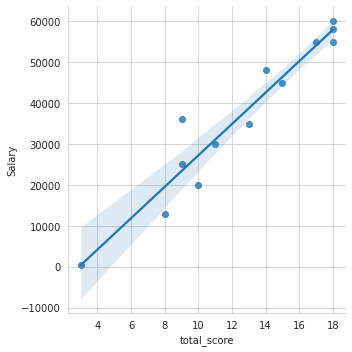

In [29]:
sns.set_style('whitegrid')
sns.lmplot(x ='total_score', y ='Salary', data = new_df)


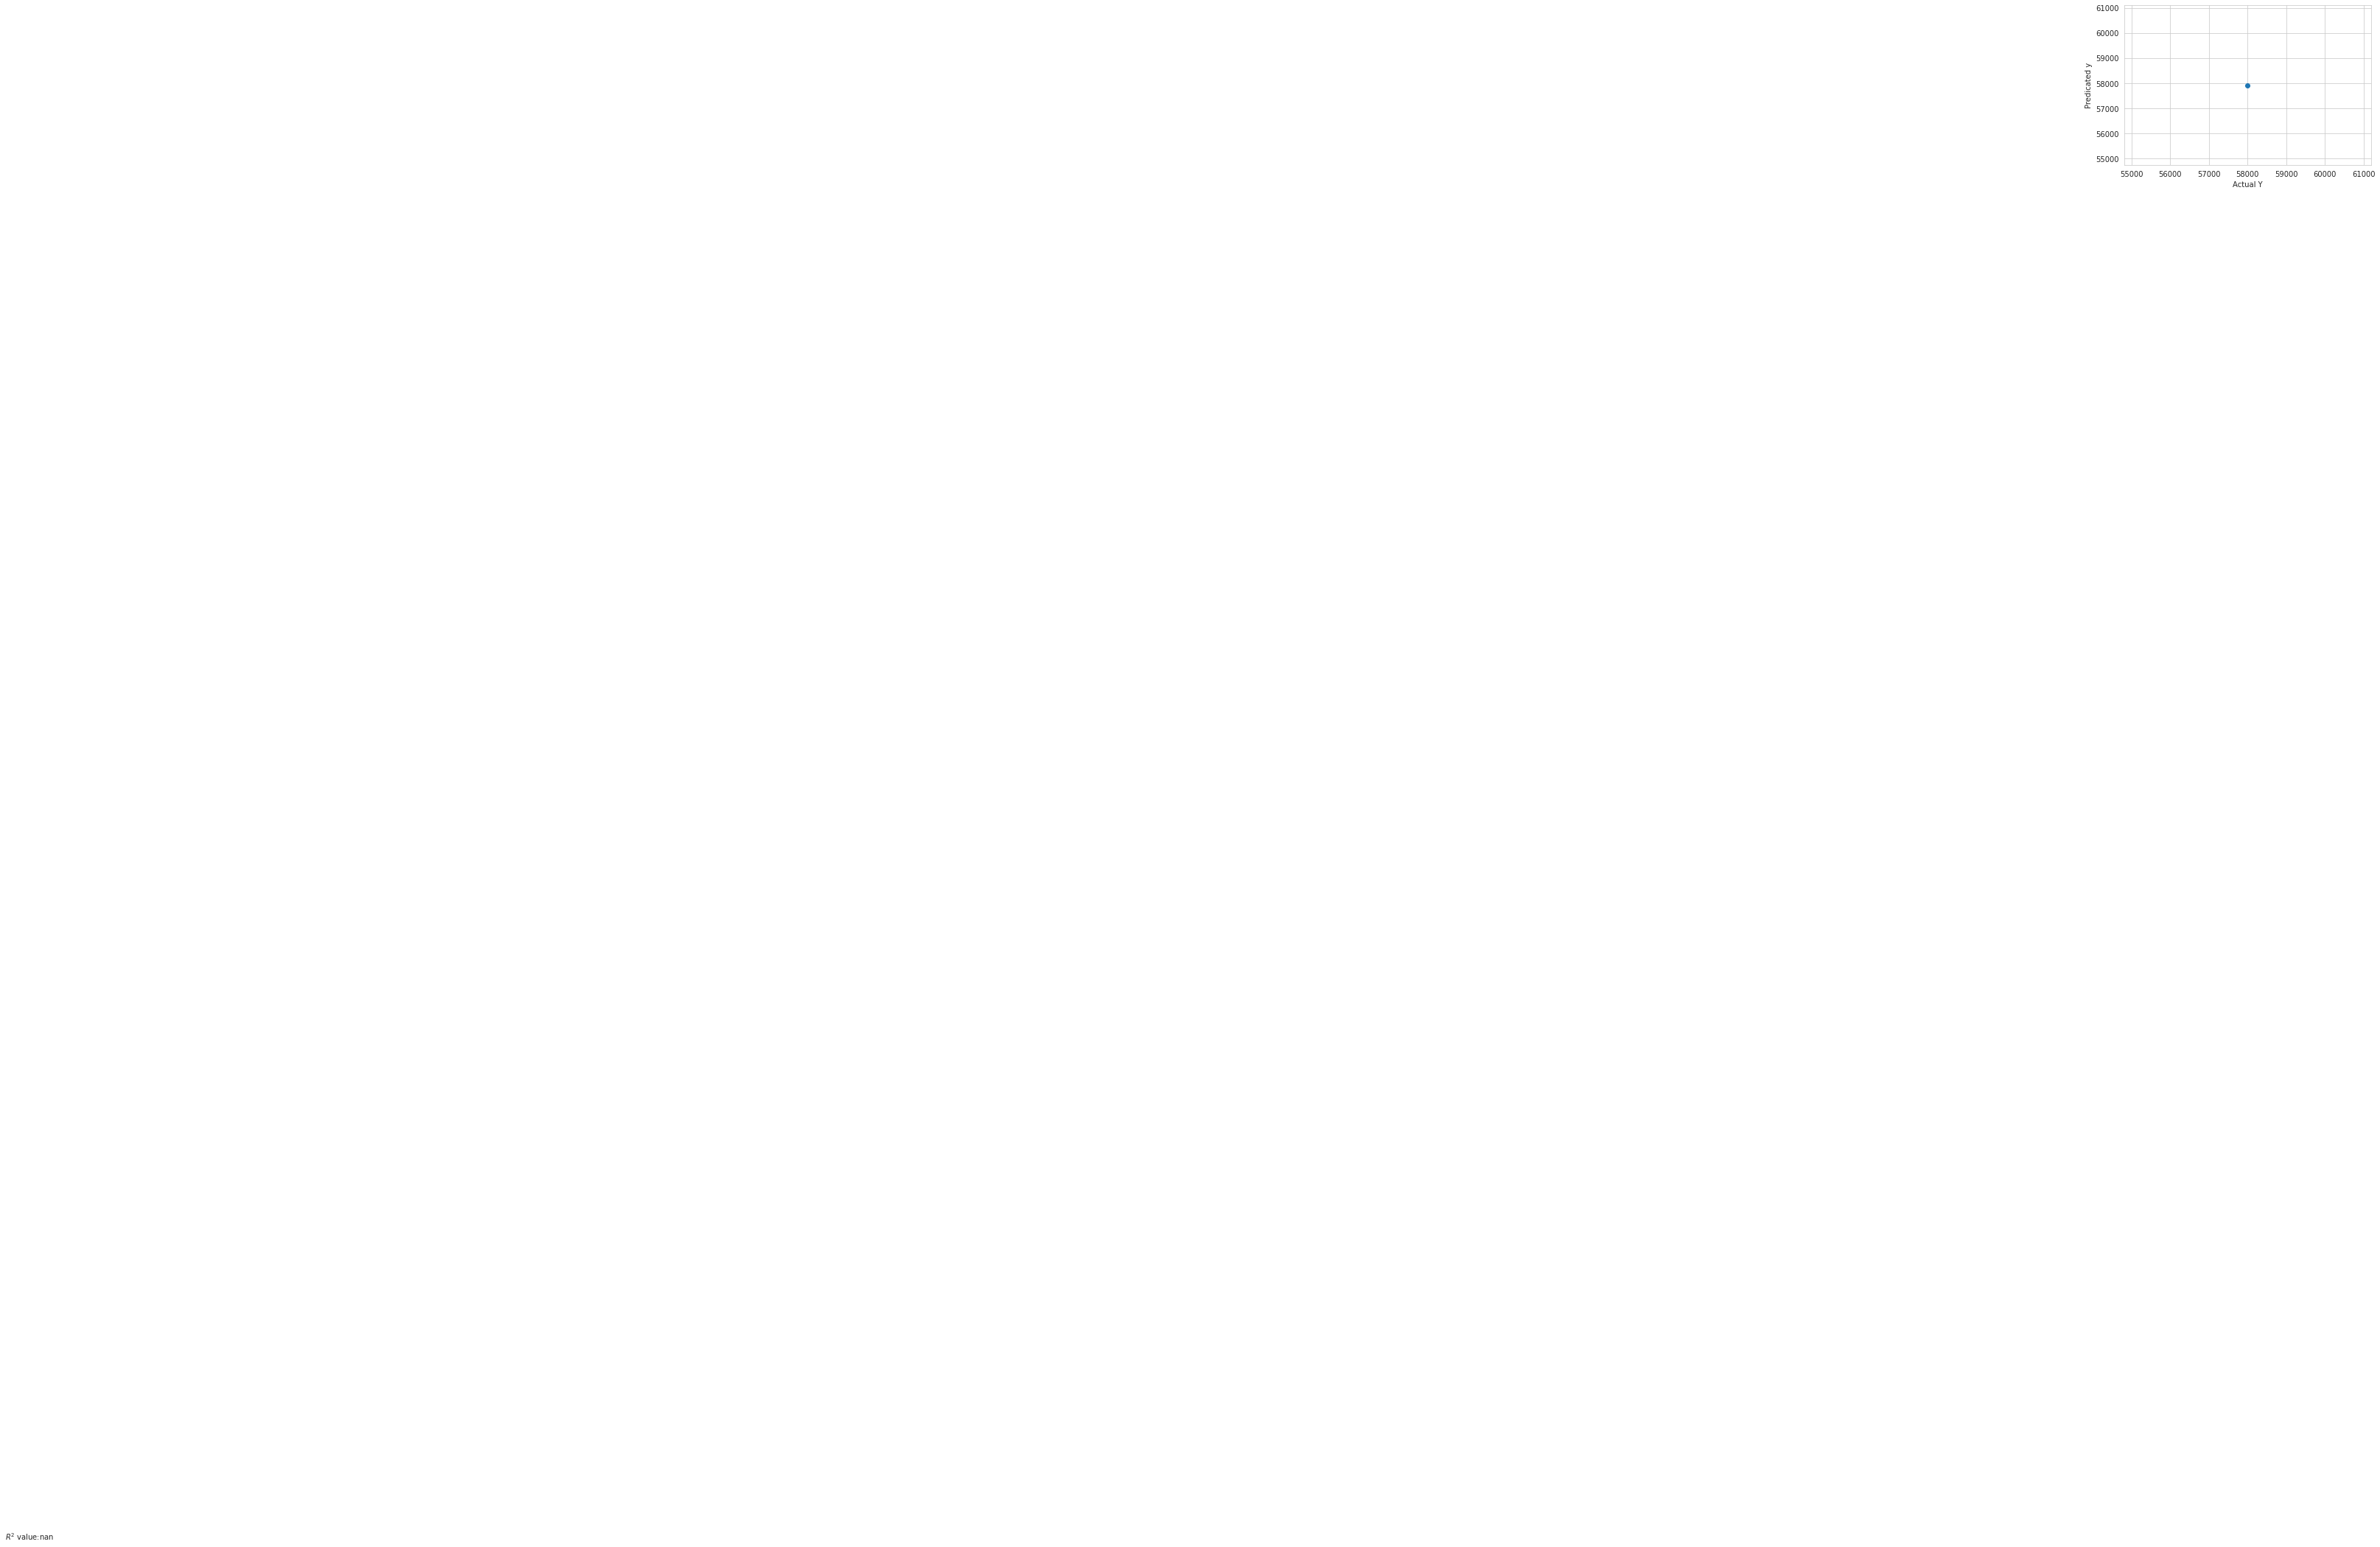

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred)
ax.text(10,50,f"$R^2$ value:{r_2:.2f}")
ax.set_xlabel('Actual Y')
ax.set_ylabel('Predicated y')
plt.show()
